In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tensorflow-gpu

     |████████████████████████████████| 394.7MB 42kB/s 


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [64, 64]

train_path = '/content/drive/MyDrive/chest_xray/train'
valid_path = '/content/drive/MyDrive/chest_xray/test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/chest_xray/train/*')
folders

['/content/drive/MyDrive/chest_xray/train/PNEUMONIA',
 '/content/drive/MyDrive/chest_xray/train/NORMAL']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)


In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
p_model = model.fit(training_set,
                    validation_data=test_set,
                    epochs=10,
                    steps_per_epoch=len(training_set),
                    validation_steps=len(test_set)
                    )

Epoch 1/10
326/326 [==============================] - 1927s 6s/step - loss: 0.8964 - accuracy: 0.8630 - val_loss: 1.6615 - val_accuracy: 0.8333
Epoch 2/10
326/326 [==============================] - 65s 200ms/step - loss: 0.7668 - accuracy: 0.9100 - val_loss: 1.8190 - val_accuracy: 0.8510
Epoch 3/10
326/326 [==============================] - 65s 200ms/step - loss: 0.5687 - accuracy: 0.9208 - val_loss: 0.7931 - val_accuracy: 0.8926
Epoch 4/10
326/326 [==============================] - 65s 200ms/step - loss: 0.6796 - accuracy: 0.9235 - val_loss: 1.2617 - val_accuracy: 0.8974
Epoch 5/10
326/326 [==============================] - 65s 200ms/step - loss: 0.6121 - accuracy: 0.9377 - val_loss: 0.8099 - val_accuracy: 0.8958
Epoch 6/10
326/326 [==============================] - 65s 200ms/step - loss: 0.4979 - accuracy: 0.9377 - val_loss: 1.4039 - val_accuracy: 0.8542
Epoch 7/10
326/326 [==============================] - 65s 200ms/step - loss: 0.5414 - accuracy: 0.9388 - val_loss: 1.9293 - val_acc

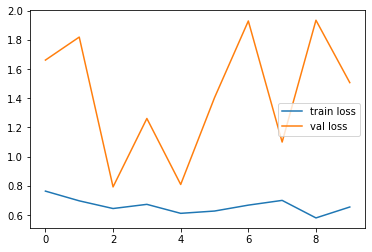

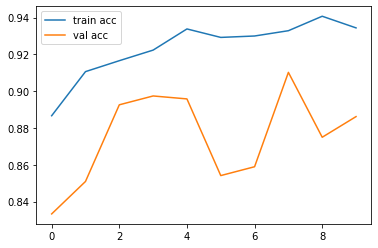

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(p_model.history['loss'], label='train loss')
plt.plot(p_model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(p_model.history['accuracy'], label='train acc')
plt.plot(p_model.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_pneumonia.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('model_pneumonia.h5')

In [ ]:

test_image = image.load_img('/content/drive/MyDrive/chest_xray/test/PNEUMONIA/person94_bacteria_458.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
#img_data = preprocess_input(test_image)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
   print("prediction = Normal")
else:
    print("prediction = Pneumonia")

prediction = Pneumonia
